In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
retail = pd.read_csv('retail_sales.txt')

In [4]:
retail.shape

(8523, 12)

In [4]:
retail.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


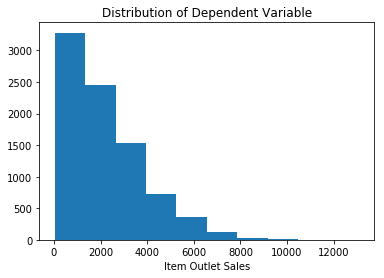

In [6]:
plt.hist(retail.Item_Outlet_Sales)
plt.xlabel('Item Outlet Sales')
plt.title('Distribution of Dependent Variable')
plt.show()

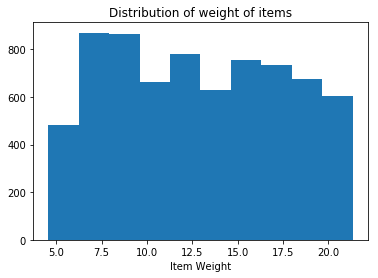

In [7]:
plt.hist(retail.Item_Weight[~np.isnan(retail.Item_Weight)])
plt.xlabel('Item Weight')
plt.title('Distribution of weight of items')
plt.show()

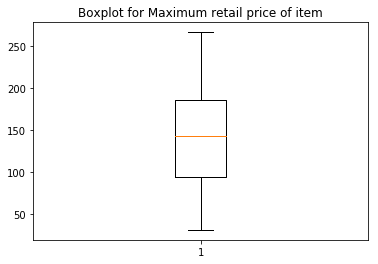

In [8]:
plt.boxplot(retail.Item_MRP)
plt.title('Boxplot for Maximum retail price of item')
plt.show()

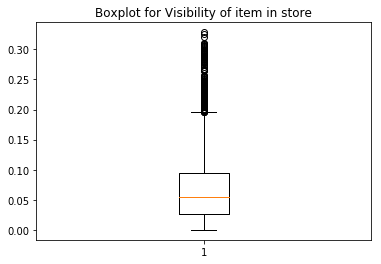

In [9]:
plt.boxplot(retail.Item_Visibility)
plt.title('Boxplot for Visibility of item in store')
plt.show()

In [10]:
num_cols = [] # using for loop to get numerical columns
for i in range(0,12):
    if((retail.dtypes != 'object')[i]):
        num_cols.append(retail.columns[i])
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [11]:
retail[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
retail[num_cols].corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [13]:
obj_cols = retail.select_dtypes(['object']).columns 
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
retail.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
retail.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
retail.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [17]:
retail.Outlet_Size.value_counts() # has missing values

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
retail.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [19]:
retail.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

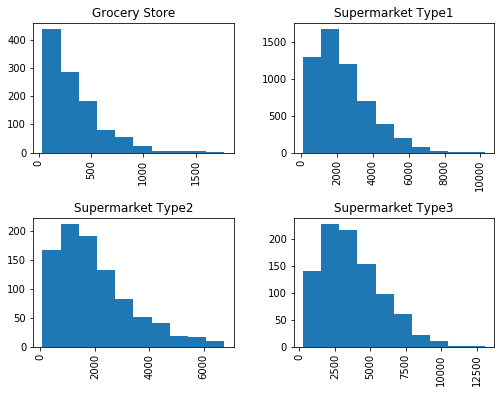

In [26]:
retail['Item_Outlet_Sales'].hist(by = retail.Outlet_Type, figsize=(8, 6))
plt.show()

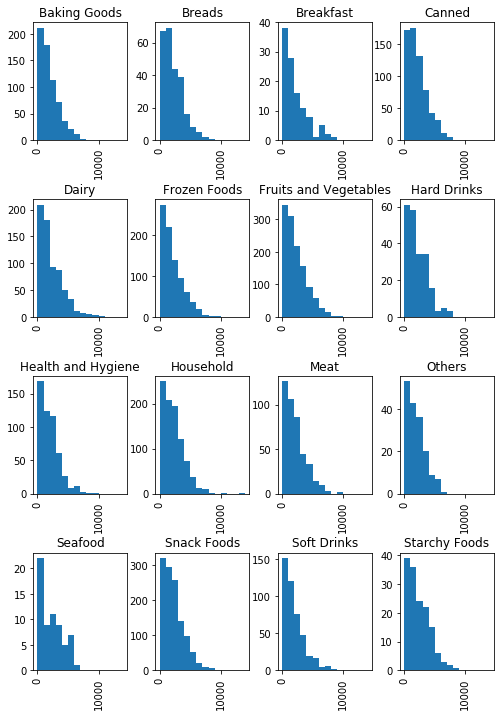

In [50]:
retail['Item_Outlet_Sales'].hist(by = retail.Item_Type, bins = np.arange(0,15000,step =1000), figsize=(8, 12))
plt.show()

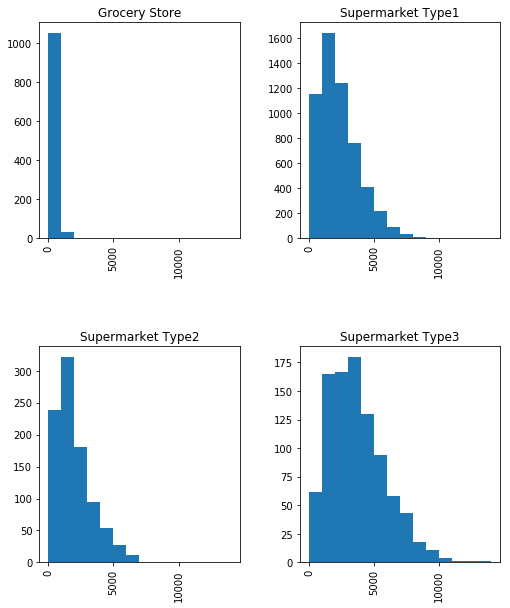

In [45]:
retail['Item_Outlet_Sales'].hist(by = retail.Outlet_Type, bins = np.arange(0, 15000, step = 1000), figsize=(8, 10))
plt.show()

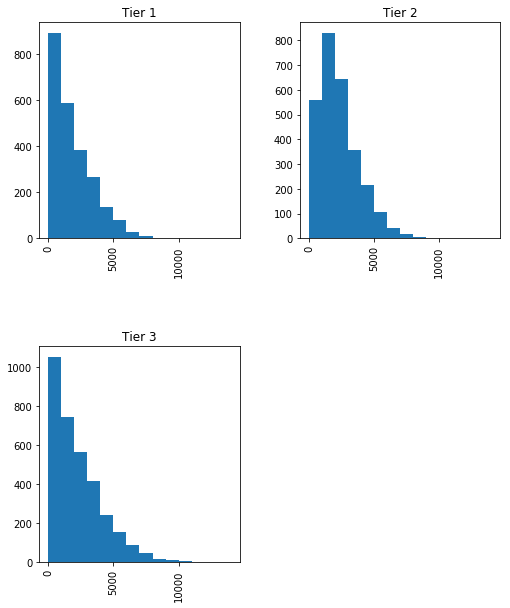

In [46]:
retail['Item_Outlet_Sales'].hist(by = retail.Outlet_Location_Type, bins = np.arange(0, 15000, step = 1000), figsize=(8, 10))
plt.show()

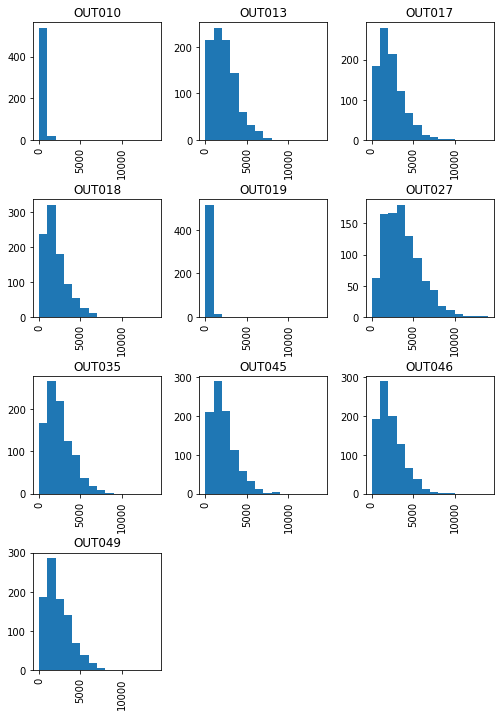

In [49]:
retail['Item_Outlet_Sales'].hist(by = retail.Outlet_Identifier, bins = np.arange(0, 15000, step = 1000), figsize=(8, 12))
plt.show()

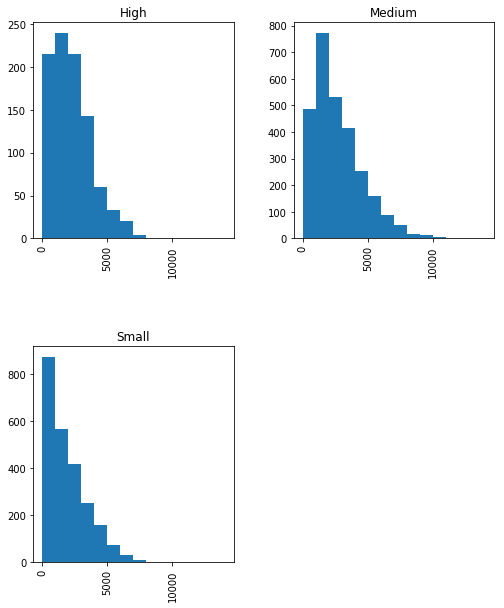

In [55]:
retail['Item_Outlet_Sales'].hist(by = retail.Outlet_Size, bins = np.arange(0, 15000, step = 1000), figsize=(8, 10))
plt.show()